### **Emerging Technology - Capstone Project**
## by AJ Dave Obis and Juan Francis Tuatis
### Lifestyle and Learning – Predicting Student Performance

# I. Introduction
This project utilizes a simulated dataset of 1,000 student records sourced from Kaggle. Each record captures key lifestyle habits—such as study hours, sleep patterns, screen time, diet, and mental health—and relates them to academic performance, specifically the final exam score. The dataset is ideal for educational machine learning applications, enabling learners to perform data preprocessing, visualization, clustering, regression, and classification.

# II. Project Goals
- Determine relationships between lifestyle habits and final exam scores 
- Discover meaningful student groupings based on lifestyle through clustering 
- Build and evaluate models that predict academic performance 
- Summarize and communicate findings through data storytelling

# III. Project Components
## 1. Problem Definition
### *Which type of screen time (Netflix vs. social media) is more harmful to student performance?*

## 2. Data Understanding and Preprocessing 


In [31]:
## Libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading of Data to be used
data = pd.read_csv("student_habits_performance(in).csv")

## Transform data into DataFrame 
data_df = pd.DataFrame(data)

data_df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


#### Dataset Inspection

In [32]:
## Dataset Inspection
print("Number of rows: ", data_df.shape[0])
print("Number of columns: ", data_df.shape[1])

## Checking for missing values 
missing_val = data_df.isnull().sum()
print("Number of missing values:\n", missing_val)

Number of rows:  1000
Number of columns:  16
Number of missing values:
 student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


#### Categorical Variables (apply label/one-hot encoding)

In [33]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ["diet_quality", "internet_quality"]
ordinal_map = [["Poor", "Fair", "Good"], ["Poor", "Average", "Good"]]

encoder = OrdinalEncoder(categories = ordinal_map)
data_df[ordinal_cols] = encoder.fit_transform(data_df[ordinal_cols])
data_df[ordinal_cols]

# Ordinal Encoder for "parental_education_level"
data_df["parental_education_level"] = data_df["parental_education_level"].fillna('Unknown')
education_order = [["Unknown", "High School", "Bachelor", "Master", "PhD"]]
encoder2 = OrdinalEncoder(categories = education_order)

data_df[["parental_education_level"]] = encoder2.fit_transform(data_df[["parental_education_level"]])
data_df.head()


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,1.0,6,3.0,1.0,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,2.0,6,1.0,1.0,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,0.0,1,1.0,0.0,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,0.0,4,3.0,2.0,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,1.0,3,3.0,2.0,1,No,66.4


Ordinal Encoding was used to convert the categorical data into numerical values while perservinf the inherent ranking of the categories. Poor --> 0, Fair/Average --> 1, Good --> 2.

For the missing values in the "parental_education_level" another order was introduced called "Unknown". This helps in keeping the informations and helps in pattern recognition, while preserving all the data.

In [34]:
from sklearn.preprocessing import LabelEncoder

label_cols = ["gender", "part_time_job","extracurricular_participation"]
le = LabelEncoder()
data_df["gender"] = le.fit_transform(data_df["gender"])
data_df["part_time_job"] = le.fit_transform(data_df["part_time_job"])
data_df["extracurricular_participation"] = le.fit_transform(data_df["extracurricular_participation"])

data_df.head()


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,0,0.0,1.2,1.1,0,85.0,8.0,1.0,6,3.0,1.0,8,1,56.2
1,S1001,20,0,6.9,2.8,2.3,0,97.3,4.6,2.0,6,1.0,1.0,8,0,100.0
2,S1002,21,1,1.4,3.1,1.3,0,94.8,8.0,0.0,1,1.0,0.0,1,0,34.3
3,S1003,23,0,1.0,3.9,1.0,0,71.0,9.2,0.0,4,3.0,2.0,1,1,26.8
4,S1004,19,0,5.0,4.4,0.5,0,90.9,4.9,1.0,3,3.0,2.0,1,0,66.4


Since there are only 2 values for the columns "gender", "part_time_job", and "extracurricular_participation" label encoding was used. There are no inherent orders for their values, only two categories so Label Enconding is efficient. This avoids the addition of unnecessary columns that one-hot encoding would create.

#### Adding of New Feature
"total_screen_time" this captures the overall exposure of the students weather it is Netflix or social media.
"netflix_social_ratio" reletive prefernece between Netflix vs social media.
"screen_study_ratio" "screen_sleep_ratio" reflects the interactions between screen time and other habits like study and sleep hours.


In [35]:
data_df["total_screen_time"] = data_df["netflix_hours"] + data_df["social_media_hours"]
data_df["netflix_social_ratio"] = data_df["netflix_hours"] / (data_df["social_media_hours"] + 0.1)
## 0.1 is added to the denominator is act as an safeguard against divsion by zero.

data_df["screen_study_ratio"] = data_df["total_screen_time"] / (data_df["study_hours_per_day"] + 0.1)
data_df["screen_sleep_ratio"] = data_df["total_screen_time"] / (data_df["sleep_hours"] + 0.1)

## Rearraging the column order
data_df = data_df[["student_id", "age", "gender", "study_hours_per_day",
                   "sleep_hours", "social_media_hours", "netflix_hours", 
                   "total_screen_time", "netflix_social_ratio", "part_time_job", 
                   "attendance_percentage", "sleep_hours",  "screen_study_ratio",
                   "screen_sleep_ratio", "diet_quality", "exercise_frequency",
                   "parental_education_level", "internet_quality", "mental_health_rating",
                   "extracurricular_participation", "exam_score"]]
data_df.head()


,student_id,age,gender,study_hours_per_day,sleep_hours,social_media_hours,netflix_hours,total_screen_time,netflix_social_ratio,part_time_job,...,sleep_hours,screen_study_ratio,screen_sleep_ratio,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,0,0.0,8.0,1.2,1.1,2.3,0.846154,0,...,8.0,23.000000,0.283951,1.0,6,3.0,1.0,8,1,56.2
1,S1001,20,0,6.9,4.6,2.8,2.3,5.1,0.793103,0,...,4.6,0.728571,1.085106,2.0,6,1.0,1.0,8,0,100.0
2,S1002,21,1,1.4,8.0,3.1,1.3,4.4,0.406250,0,...,8.0,2.933333,0.543210,0.0,1,1.0,0.0,1,0,34.3
3,S1003,23,0,1.0,9.2,3.9,1.0,4.9,0.250000,0,...,9.2,4.454545,0.526882,0.0,4,3.0,2.0,1,1,26.8
4,S1004,19,0,5.0,4.9,4.4,0.5,4.9,0.111111,0,...,4.9,0.960784,0.980000,1.0,3,3.0,2.0,1,0,66.4


#### Scaling (For models like K-Means and regression)

In [28]:
from sklearn.preprocessing import StandardScaler

numeric_features = ["study_hours_per_day", "sleep_hours", 
                    "social_media_hours", "netflix_hours", "total_screen_time", 
                    "netflix_social_ratio", "attendance_percentage", 
                    "sleep_hours",  "screen_study_ratio", "screen_sleep_ratio", 
                    "exercise_frequency", "internet_quality", "mental_health_rating", "extracurricular_participation"]

scaler = StandardScaler()
data_df[numeric_features] = scaler.fit_transform(data_df[numeric_features])
data_df.head()

C:\Users\AJ Dave\AppData\Local\Temp\ipykernel_3284\2147591482.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[numeric_features] = scaler.fit_transform(data_df[numeric_features])


,student_id,age,gender,study_hours_per_day,sleep_hours,social_media_hours,netflix_hours,total_screen_time,netflix_social_ratio,part_time_job,...,screen_study_ratio,screen_sleep_ratio,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,clusters
0,S1000,23,0,-2.418068,1.248120,-1.114064,-0.669750,-1.266536,-0.143060,0,...,4.087004,-1.392043,1.0,1.461166,3.0,-0.392302,0.900186,1.464464,56.2,4
1,S1001,20,0,2.281707,-1.525661,0.251315,0.446965,0.484551,-0.158934,0,...,-0.250328,1.401688,2.0,1.461166,1.0,-0.392302,0.900186,-0.682844,100.0,0
2,S1002,21,1,-1.464491,1.248120,0.507324,-0.483631,0.046779,-0.274687,0,...,0.179047,-0.487973,0.0,-1.008689,1.0,-1.768800,-1.559339,-0.682844,34.3,1
3,S1003,23,0,-1.736942,2.227102,1.190013,-0.762810,0.359473,-0.321440,0,...,0.475301,-0.544911,0.0,0.473224,3.0,0.984196,-1.559339,1.464464,26.8,1
4,S1004,19,0,0.987566,-1.280916,1.616694,-1.228108,0.359473,-0.362998,0,...,-0.205104,1.035169,1.0,-0.020747,3.0,0.984196,-1.559339,-0.682844,66.4,0


## 3. Exploratory Data Analysis (EDA)

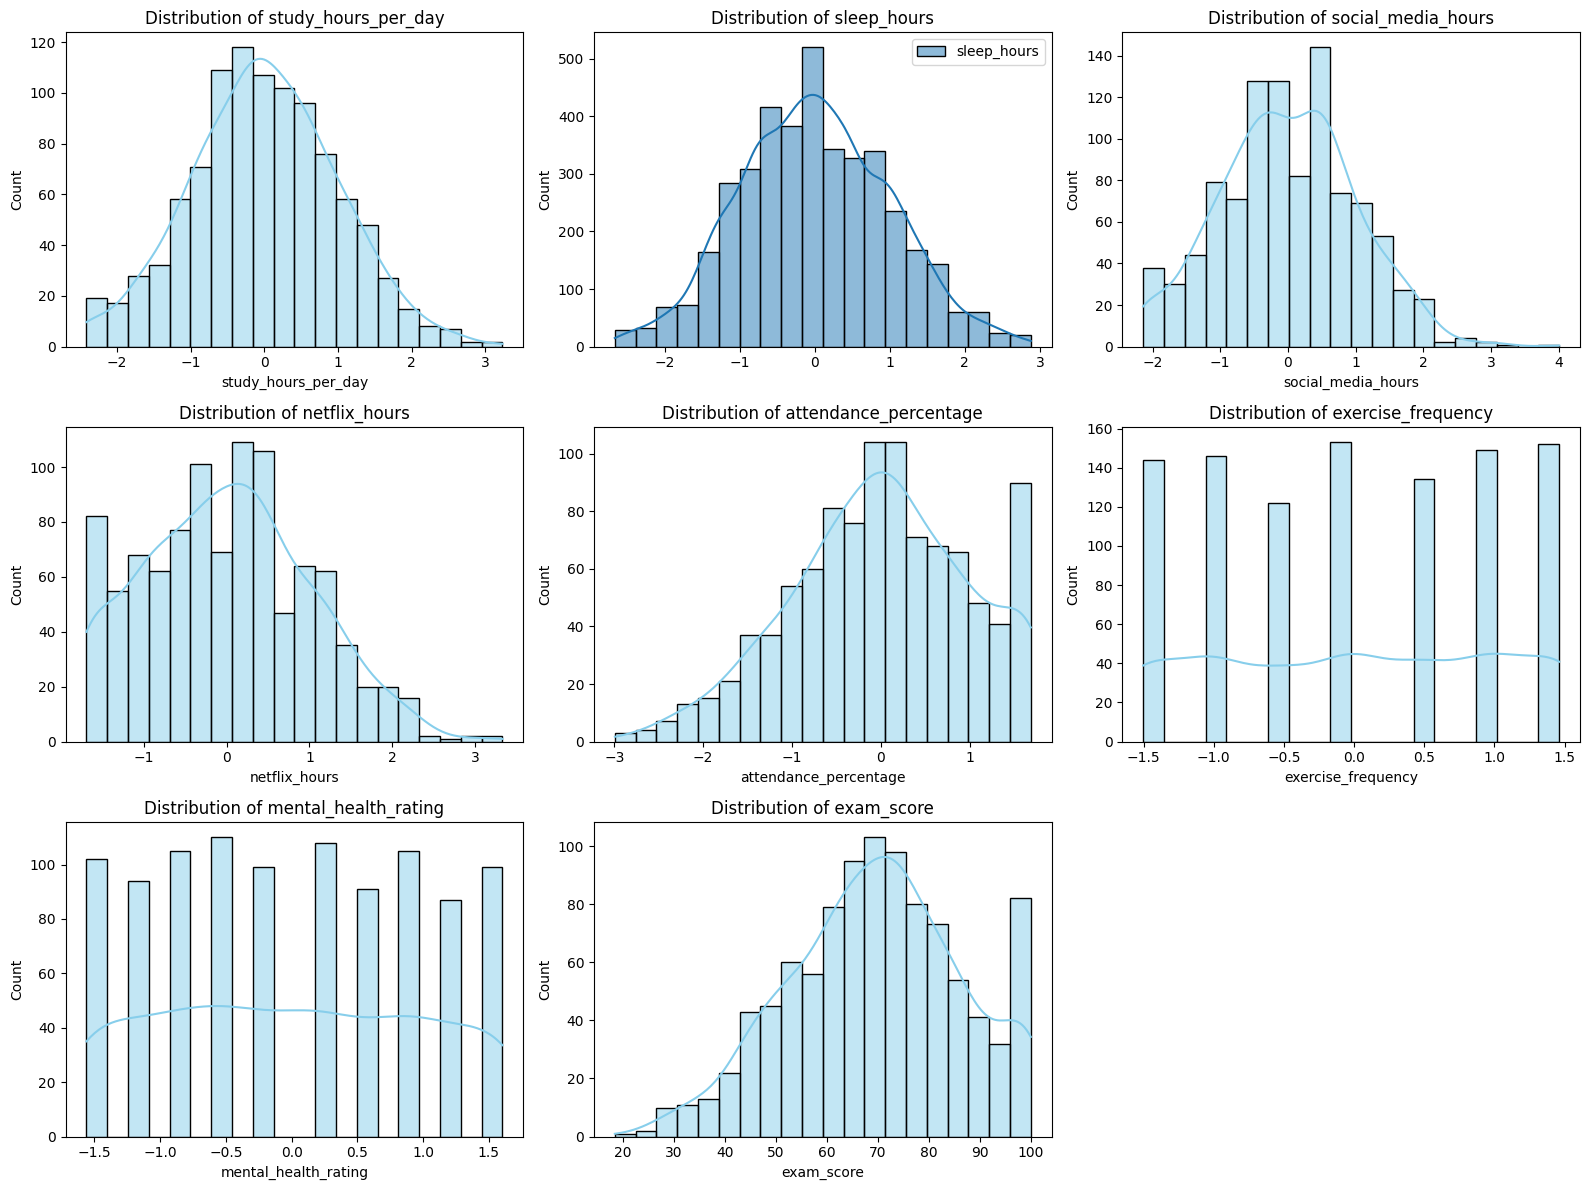

In [20]:
num_cols = [
    'study_hours_per_day', 'sleep_hours', 'social_media_hours',
    'netflix_hours', 'attendance_percentage', 'exercise_frequency',
    'mental_health_rating', 'exam_score'
]

# Plot histograms
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data_df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

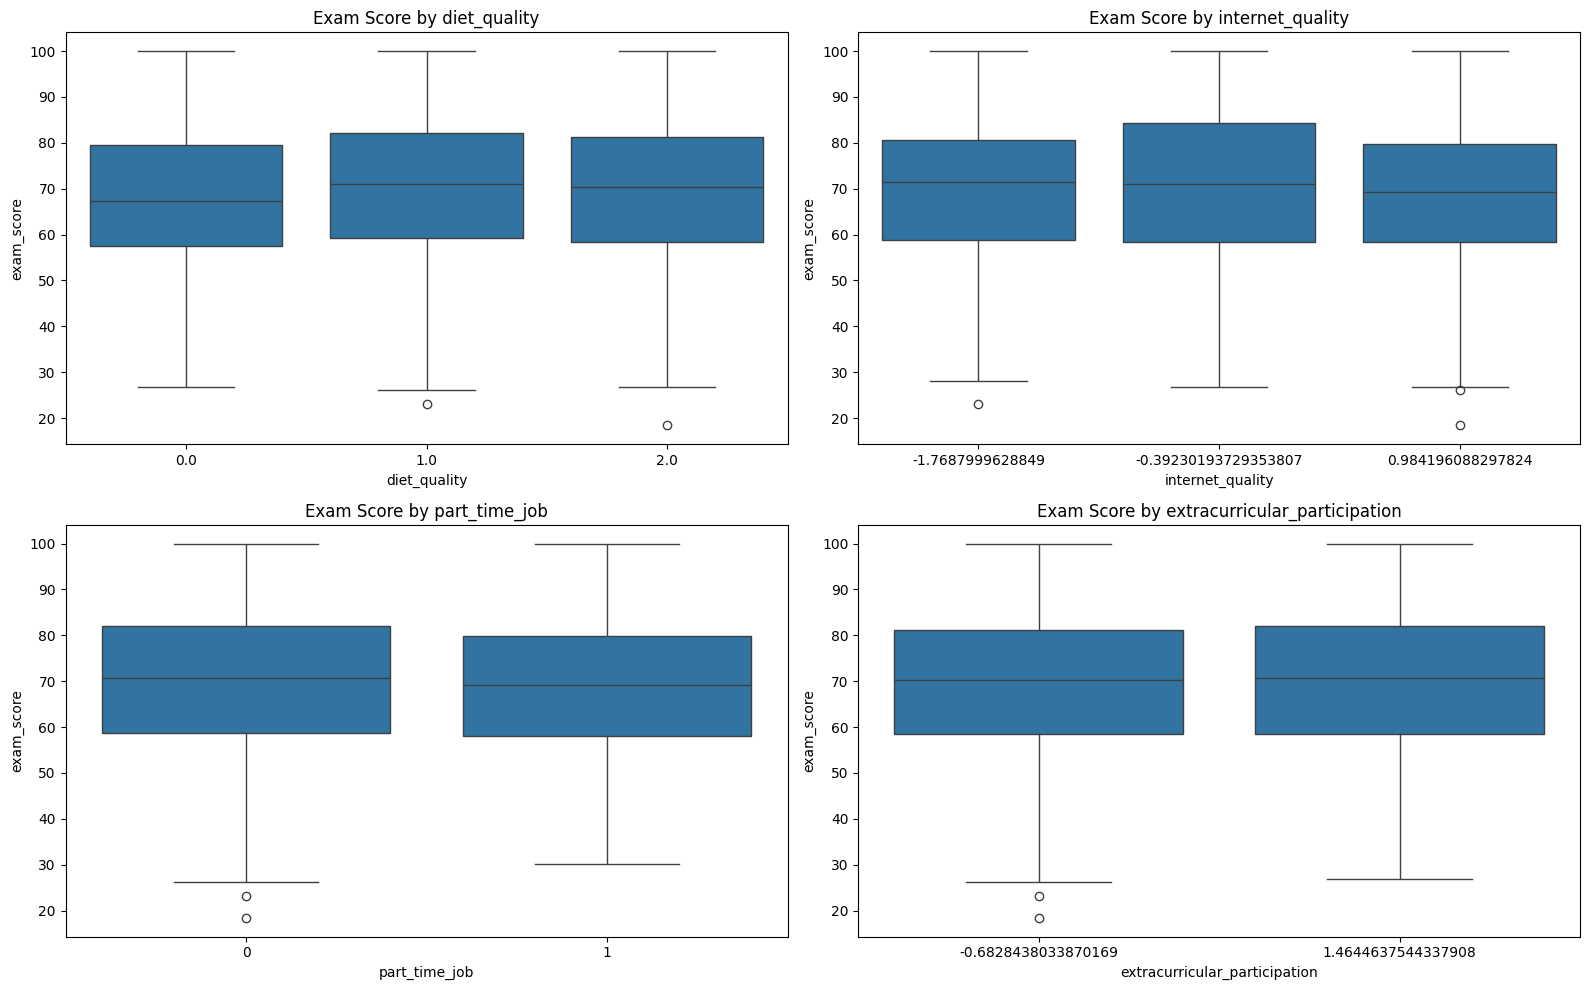

In [21]:
cat_cols = ['diet_quality', 'internet_quality', 'part_time_job', 'extracurricular_participation']

plt.figure(figsize=(16, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y='exam_score', data=data_df)  # Not df[[col]], just col name
    plt.title(f'Exam Score by {col}')
plt.tight_layout()
plt.show()


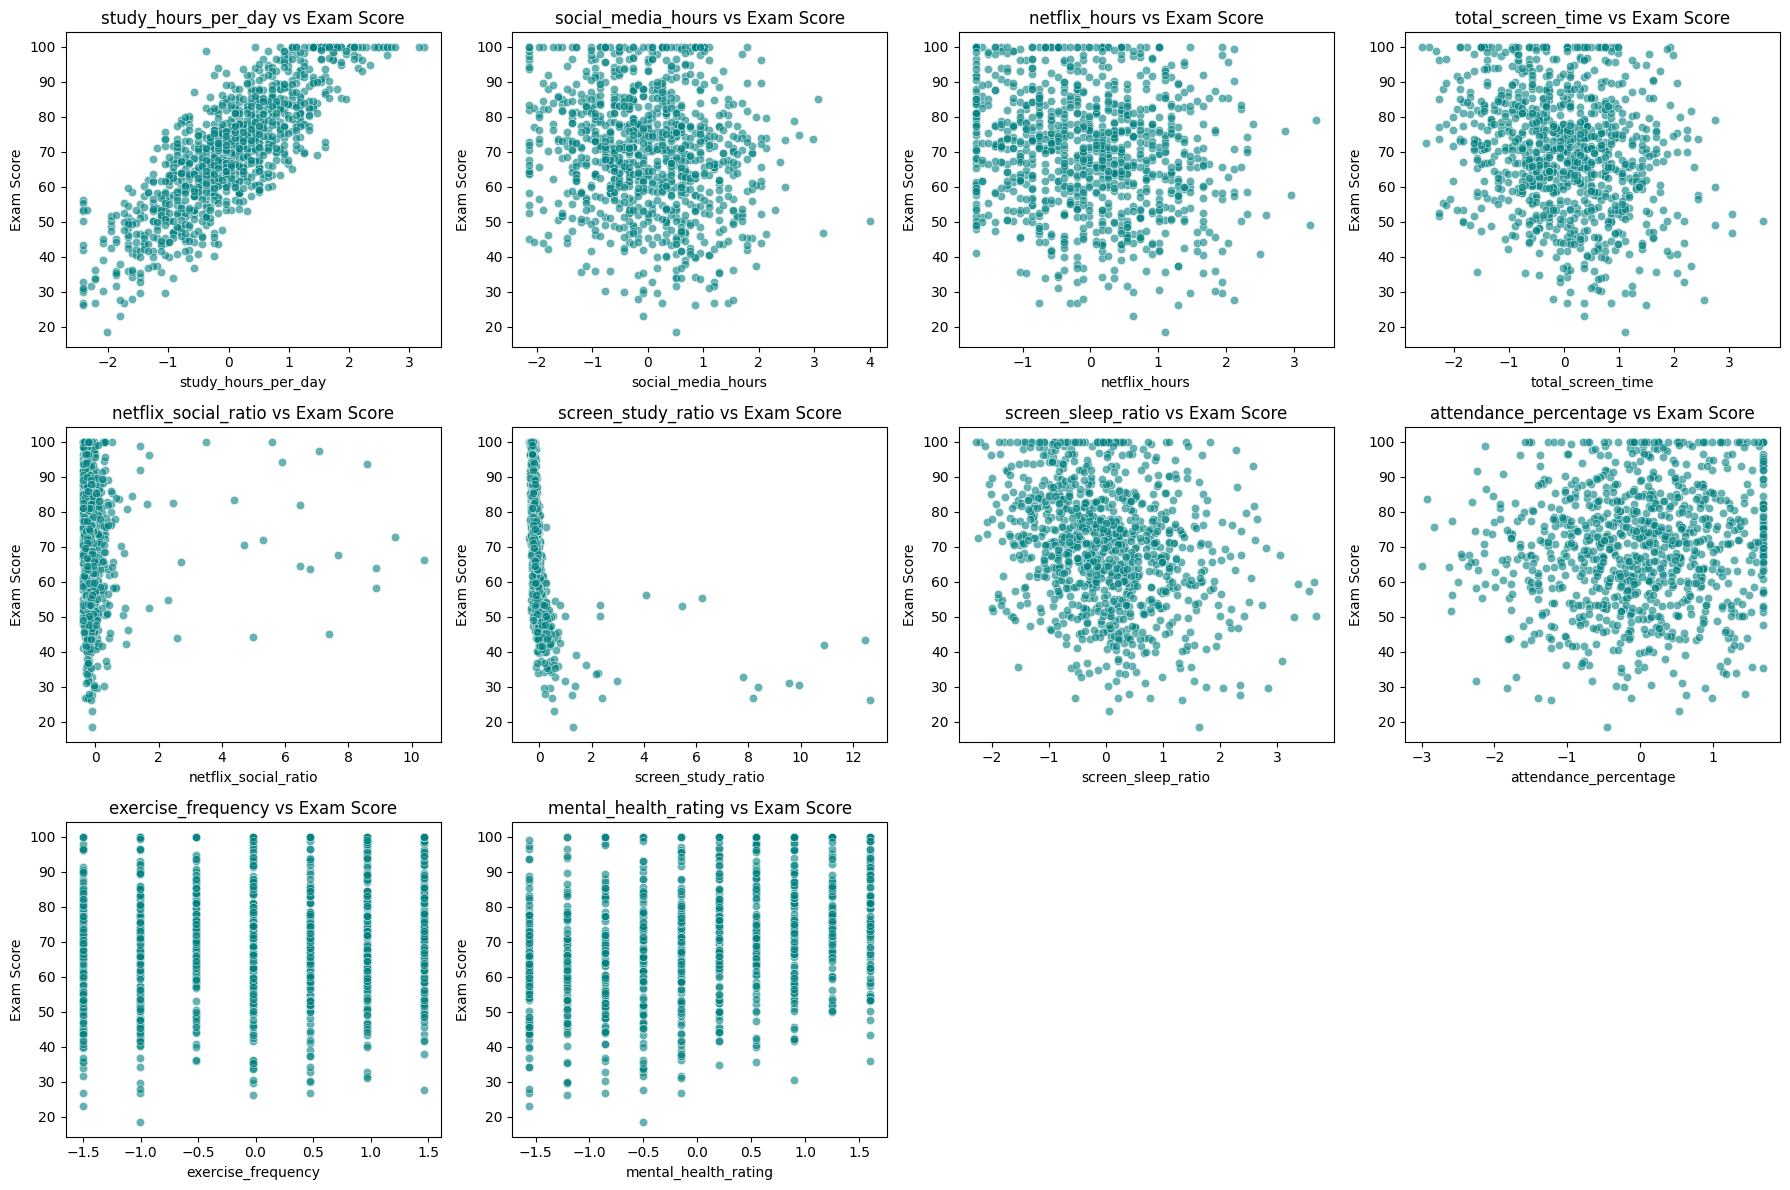

In [22]:
# List of features to compare against exam_score
features_to_plot = [
    'study_hours_per_day', 
    'social_media_hours', 
    'netflix_hours', 
    'total_screen_time',
    'netflix_social_ratio',
    'screen_study_ratio',
    'screen_sleep_ratio',
    'attendance_percentage', 
    'exercise_frequency', 
    'mental_health_rating'
]

# Set up the plot grid
plt.figure(figsize=(18, 12))

# Loop through each feature and plot against exam_score
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 4, i)
    sns.scatterplot(x=data_df[feature], y=data_df['exam_score'], alpha=0.6, color='teal')
    plt.title(f'{feature} vs Exam Score')
    plt.xlabel(feature)
    plt.ylabel('Exam Score')

plt.tight_layout()
plt.show()


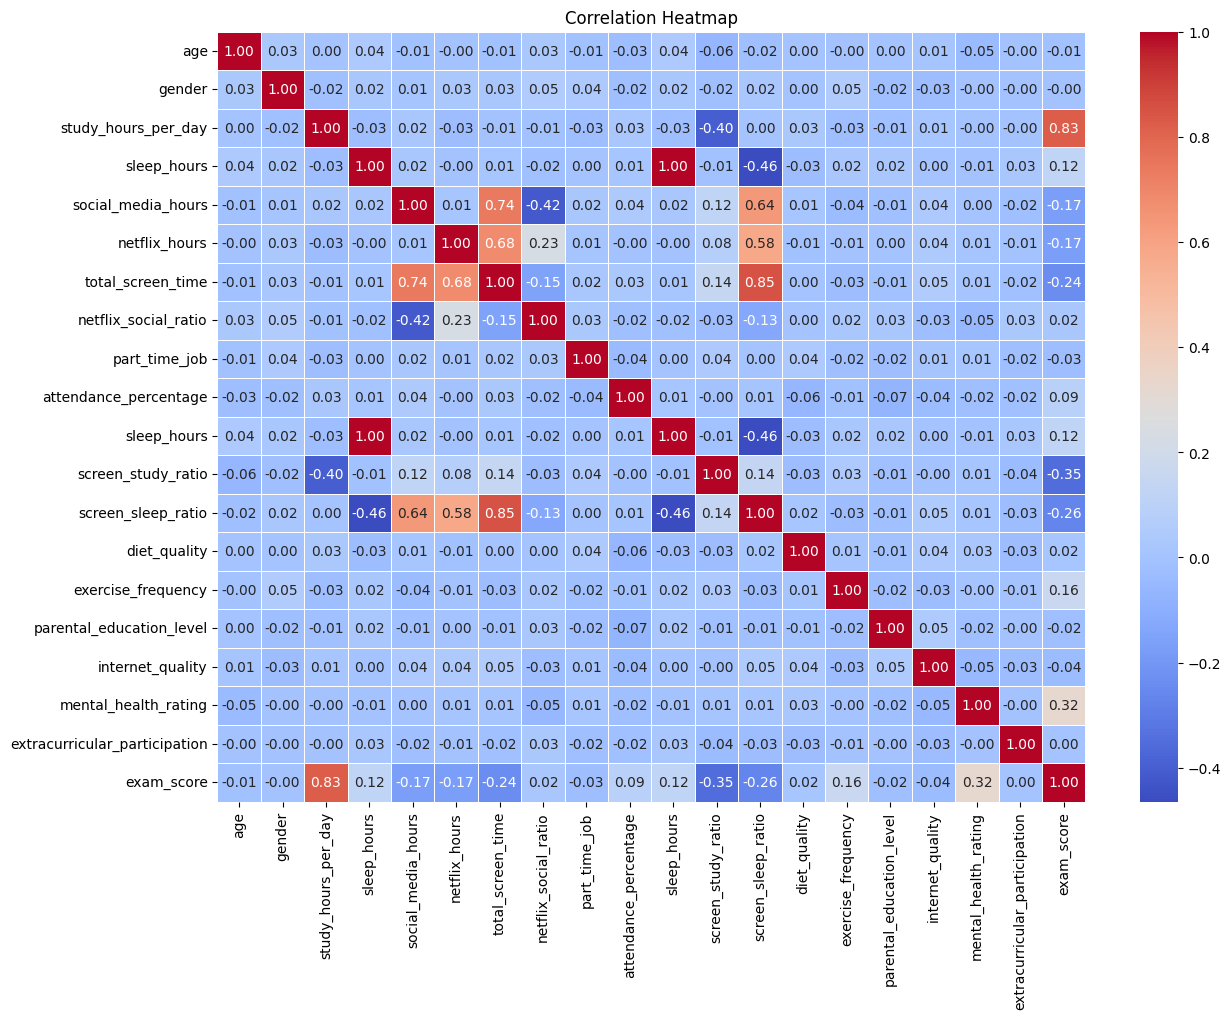

Top correlations with exam_score:
 study_hours_per_day     0.825419
screen_study_ratio      0.354767
mental_health_rating    0.321523
screen_sleep_ratio      0.263949
total_screen_time       0.237631
Name: exam_score, dtype: float64


In [23]:
# Only include numeric columns (after encoding)
corr_matrix = data_df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

cor_target = corr_matrix['exam_score'].abs().sort_values(ascending=False)
print("Top correlations with exam_score:\n", cor_target[1:6])


## 4. Clustering (Unsupervised Learning)
Apply K-Means clustsering using lifestyle features (excluding exam scores)

#### Elbow Method
 

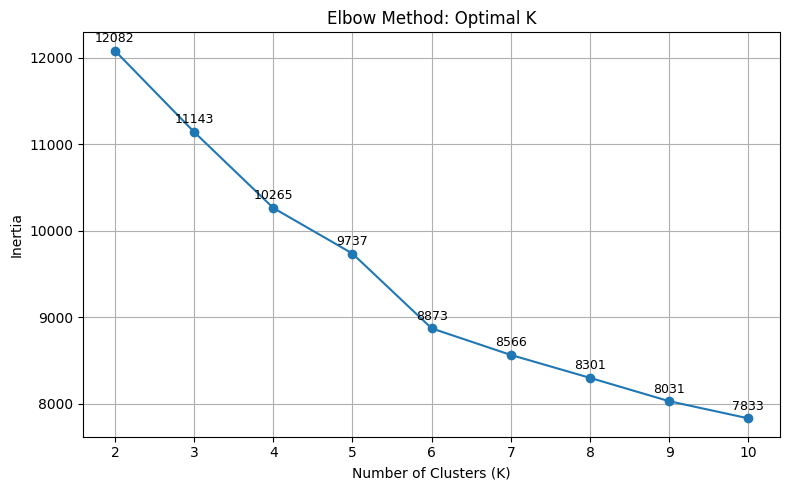

In [24]:
from sklearn.cluster import KMeans

# Columns to be used
lifestyle_feature = [
    'study_hours_per_day', 'sleep_hours', 'social_media_hours',
    'netflix_hours', 'total_screen_time','attendance_percentage', 
    'netflix_social_ratio', 'screen_study_ratio', 'screen_sleep_ratio', 
    'diet_quality', 'exercise_frequency', 'internet_quality', 'mental_health_rating'
]

X = scaler.fit_transform(data_df[lifestyle_feature])
# Standardize selected values

inertia = []
K_range = range(2,11)

for k in K_range: 
    kmeans = KMeans(n_clusters= k, random_state = 42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method: Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# Add value labels to each point
for i, value in enumerate(inertia):
    plt.text(K_range[i], value + 100, f'{int(value)}', ha='center', fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()


From the plot output above, it can be seen that the points where the inertie value drops the biggest are from K=2 to K=3 and from K=5 to K=6. After K=6, the decrease in the value becomes more gradual and less significant.  

#### Silhouette Score

Silhouette Score for K=2: 0.130
Silhouette Score for K=3: 0.108
Silhouette Score for K=4: 0.118
Silhouette Score for K=5: 0.099
Silhouette Score for K=6: 0.107
Silhouette Score for K=7: 0.101
Silhouette Score for K=8: 0.097
Silhouette Score for K=9: 0.095
Silhouette Score for K=10: 0.093


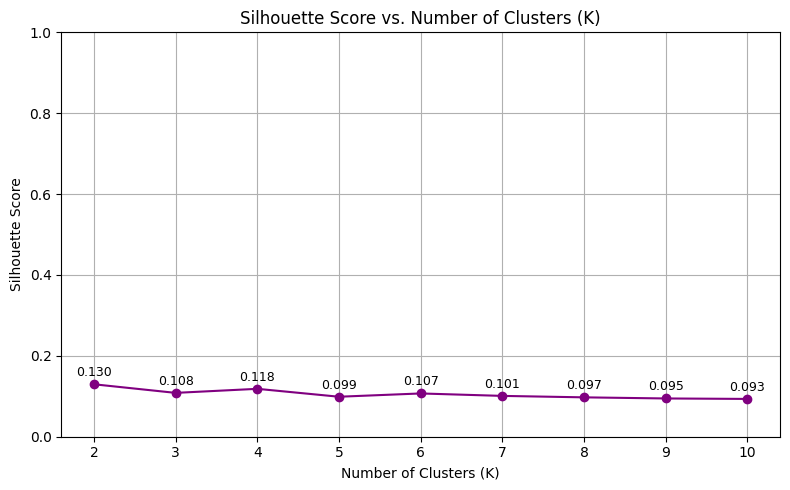

In [25]:
from sklearn.metrics import silhouette_score 

silhouette_scores = [] 

for k in K_range: 
    kmeans = KMeans(n_clusters= k, random_state= 42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    
    silhouette_scores.append(score)
    
    print(f'Silhouette Score for K={k}: {score:.3f}')

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='purple')
plt.title('Silhouette Score vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)  # silhouette score ranges from -1 to 1

# Add value labels on each point
for i, score in enumerate(silhouette_scores):
    plt.text(K_range[i], score + 0.02, f'{score:.3f}', ha='center', fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()


From the plot above, it is clearly seen that K=1 has the highest silhouette score, there being the best cluster separtion. However, choosing K-2 may oversimplify students lifestyles.  On the otherhand, K=6 has a reasonably good silhouette score which is 0.107. While K-2 yielded the highest silhouette score, K=6 gives more nuanced and actionable lifestyle insights without sacrificing cluster quality. 

#### Applying the Optimal Value of Cluster


In [87]:
optimal_K = 6
kmeans = KMeans(n_clusters=optimal_K, random_state=42)
data_df['clusters'] = kmeans.fit_predict(X)

cluster_summary = data_df.groupby('clusters')[lifestyle_feature + ['exam_score']].mean().round(2)
cluster_summary

C:\Users\AJ Dave\AppData\Local\Temp\ipykernel_3284\1653761747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['clusters'] = kmeans.fit_predict(X)


,study_hours_per_day,sleep_hours,sleep_hours,social_media_hours,netflix_hours,total_screen_time,attendance_percentage,netflix_social_ratio,screen_study_ratio,screen_sleep_ratio,diet_quality,exercise_frequency,internet_quality,mental_health_rating,exam_score
clusters,,,,,,,,,,,,,,,
0,3.53,6.44,6.44,2.38,1.83,4.21,76.78,1.43,1.51,0.67,1.27,3.10,1.28,5.45,68.69
1,3.57,6.54,6.54,2.56,1.81,4.36,90.46,1.37,1.61,0.68,1.19,3.15,1.19,5.92,71.91
2,3.64,6.43,6.43,2.55,1.90,4.45,98.09,1.45,1.53,0.70,1.11,2.84,1.29,5.15,71.37
3,0.00,6.01,6.01,3.06,1.84,4.90,84.12,0.64,49.00,0.85,1.00,3.60,1.20,5.50,37.09
4,3.60,6.51,6.51,2.52,1.85,4.37,67.25,1.55,1.37,0.69,1.25,2.92,1.38,5.89,68.23
5,3.61,6.46,6.46,2.52,1.76,4.28,83.85,1.07,1.57,0.67,1.17,3.06,1.32,5.05,69.27


## 5. Regression Analysis (Supervised Learning)

In [ ]:
# Import Libraries
from sklearn.model_selection import train_test_split

# Data Preprocessing
# Drop target from features along with the student ID which will not be used for training
X = data_df.drop(["exam_score", "student_id"], axis=1)
y = data_df["exam_score"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### • Use the following models to predict Final Exam Score:

### o Linear Regression

In [ ]:
# Import Library
from sklearn.linear_model import LinearRegression

# Train Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

### o Decision Tree Regressor

In [ ]:
# Import Library
from sklearn.tree import DecisionTreeRegressor

# Train Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### o Random Forest Regressor

In [ ]:
# Import Library
from sklearn.ensemble import RandomForestRegressor

# Train Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Model Evaluation

Linear Regression:
MAE:  4.23
RMSE: 5.32
R²:   0.90


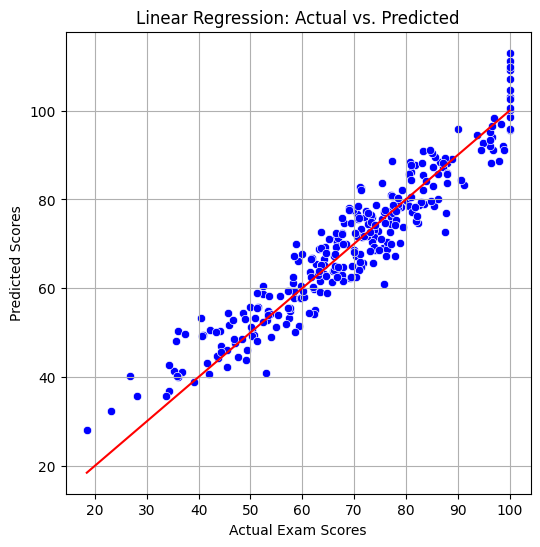

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression Model Evaluation
y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"MAE:  {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²:   {r2_lr:.2f}")

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_lr, color='blue',)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Scores")
plt.title("Linear Regression: Actual vs. Predicted")
plt.grid(True)
plt.show()

Decision Tree Regressor:
MAE:  6.52
RMSE: 8.35
R²:   0.75


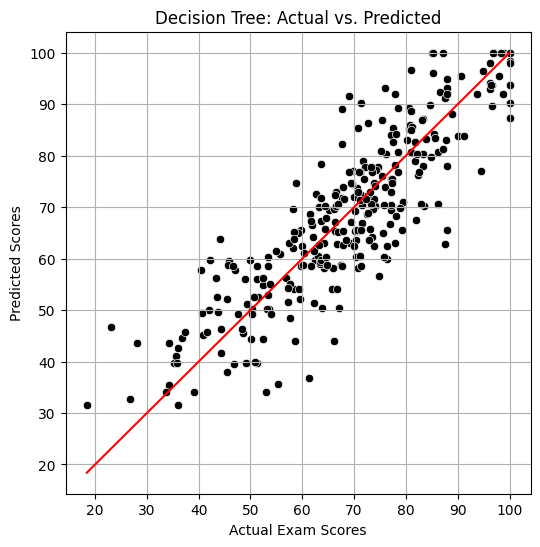

In [74]:
# Decision Tree Regressor Model Evaluation
y_pred_dt = dt_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor:")
print(f"MAE:  {mae_dt:.2f}")
print(f"RMSE: {rmse_dt:.2f}")
print(f"R²:   {r2_dt:.2f}")

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_dt, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Scores")
plt.title("Decision Tree: Actual vs. Predicted")
plt.grid(True)
plt.show()

Random Forest Regressor:
MAE:  5.14
RMSE: 6.58
R²:   0.84


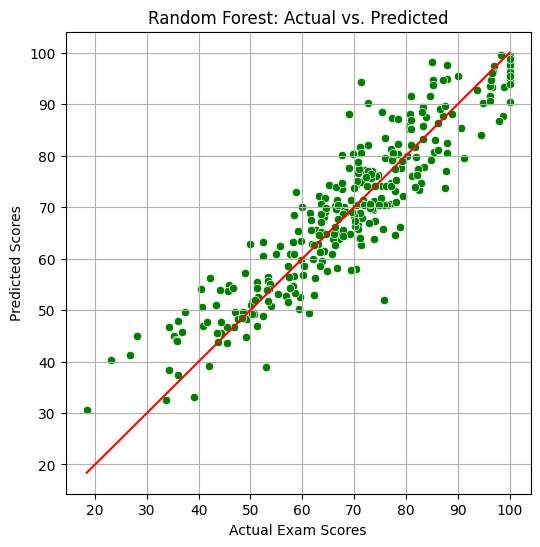

In [75]:
# Random Forest Model Evaluation
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"MAE:  {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²:   {r2_rf:.2f}")

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Scores")
plt.title("Random Forest: Actual vs. Predicted")
plt.grid(True)
plt.show()

## 6. Optional Classification Task
### • Convert scores into performance levels: 
### o Low (bottom 33%), Average (middle 34%), High (top 33%) 

In [49]:
# Compute for percentiles
low_threshold = data_df["exam_score"].quantile(0.33)
high_threshold = data_df["exam_score"].quantile(0.67)

# Set performance levels
def label_performance(score):
    if score <= low_threshold:
        return "Low"
    elif score <= high_threshold:
        return "Average"
    else:
        return "High"

# Categorize the exam scores
data_df["performance_level"] = data_df["exam_score"].apply(label_performance)

C:\Users\AJ Dave\AppData\Local\Temp\ipykernel_3284\1026830007.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["performance_level"] = data_df["exam_score"].apply(label_performance)


In [ ]:
# Data Preprocessing
X_cls = data_df.drop(["student_id", "exam_score", "performance_level"], axis=1)
y_cls = data_df["performance_level"]

# Split training and testing data
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

### • Train classification models (e.g., Logistic Regression, Decision Tree)

In [57]:
# Train Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=3000)
log_reg.fit(X_train_cls, y_train_cls)

LogisticRegression(max_iter=3000)

In [58]:
# Train Decistion Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_cls, y_train_cls)

DecisionTreeClassifier(random_state=42)

### • Evaluate with confusion matrix, accuracy, and F1-score

Logistic Regression Classifier Evaluation
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

     Average       0.80      0.82      0.81       110
        High       0.86      0.86      0.86        95
         Low       0.92      0.91      0.91        95

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



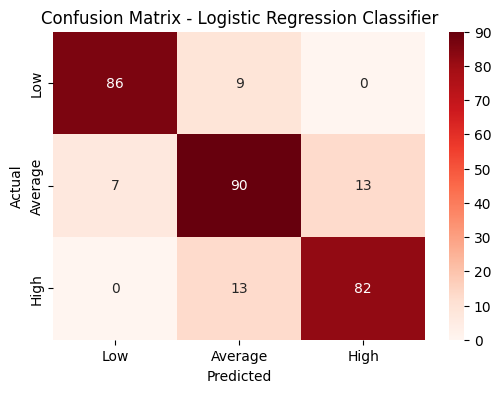

In [76]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Evaluate Logistic Regression Classifier
y_pred_log = log_reg.predict(X_test_cls)
print("Logistic Regression Classifier Evaluation")
print("Accuracy:", accuracy_score(y_test_cls, y_pred_log))
print("Classification Report:\n", classification_report(y_test_cls, y_pred_log))

# Confusion matrix for Logistic Regression Classifier
cm_log = confusion_matrix(y_test_cls, y_pred_log, labels=["Low", "Average", "High"])
plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Reds', xticklabels=["Low", "Average", "High"], yticklabels=["Low", "Average", "High"])
plt.title("Confusion Matrix - Logistic Regression Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Decision Tree Classifier Evaluation
Accuracy: 0.7433333333333333
Classification Report:
               precision    recall  f1-score   support

     Average       0.70      0.60      0.65       110
        High       0.75      0.82      0.78        95
         Low       0.77      0.83      0.80        95

    accuracy                           0.74       300
   macro avg       0.74      0.75      0.74       300
weighted avg       0.74      0.74      0.74       300



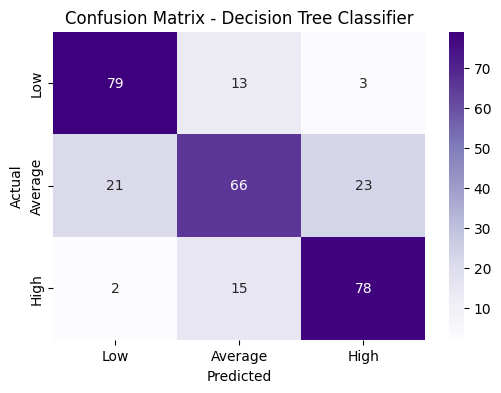

In [77]:
# Evaluate Decision Tree Classifier
y_pred_dt = dt_clf.predict(X_test_cls)
print("\nDecision Tree Classifier Evaluation")
print("Accuracy:", accuracy_score(y_test_cls, y_pred_dt))
print("Classification Report:\n", classification_report(y_test_cls, y_pred_dt))

# Confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test_cls, y_pred_dt, labels=["Low", "Average", "High"])
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Purples', xticklabels=["Low", "Average", "High"], yticklabels=["Low", "Average", "High"])
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# IV. Interpretation and Insights
## A. Feature Importance

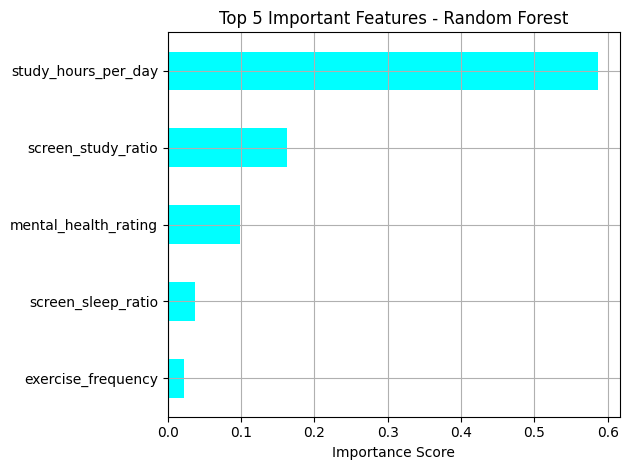

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance from Random Forest
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_rf = rf_importances.sort_values(ascending=False).head(5)

# Plot top 5
top_rf.plot(kind='barh', color='cyan')
plt.title("Top 5 Important Features - Random Forest")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

Looking at the top 5 importance features from the Random Forest plot the top 5 features are, 'study_hours_per_day', 'screen_study_ratio', 'mental_health_rating', 'screen_sleep_ratio', and exercise frequency. These shows what are the most important factors from students' lifestyle that can affect their grades as observed from the dataset

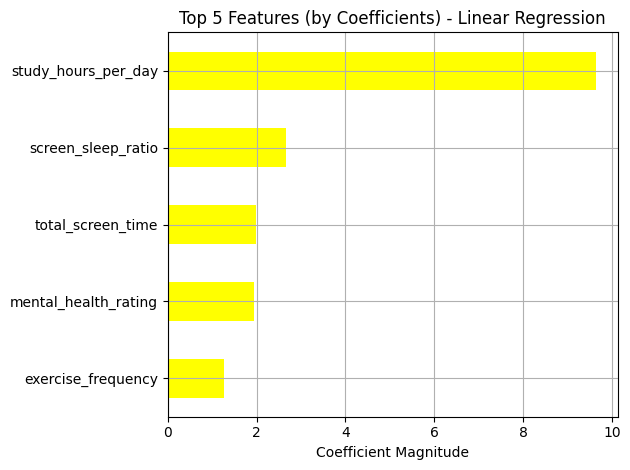

In [85]:
# Coefficients from Linear Regression
lr_coeffs = pd.Series(lr_model.coef_, index=X_train.columns)
top_lr = lr_coeffs.abs().sort_values(ascending=False).head(5)

top_lr.plot(kind='barh', color='yellow')
plt.title("Top 5 Features (by Coefficients) - Linear Regression")
plt.xlabel("Coefficient Magnitude")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

The top 5 features from the Linear Regression model shows a slightly different perspective as shown in the plot. The result shows almost the same output with the random forest having 'study_hours_per_day', 'screen_sleep_ratio', 'mental_health_rating', and exercise frequency included at the top 5 but also having 'total_screen_time' instead of 'screen_study_ratio'. These results somehow indicates a strong correlation at the real-world setting. It aligns with how a balance of life and study habits good health affect student perfomance.

## B. Cluster Profiling

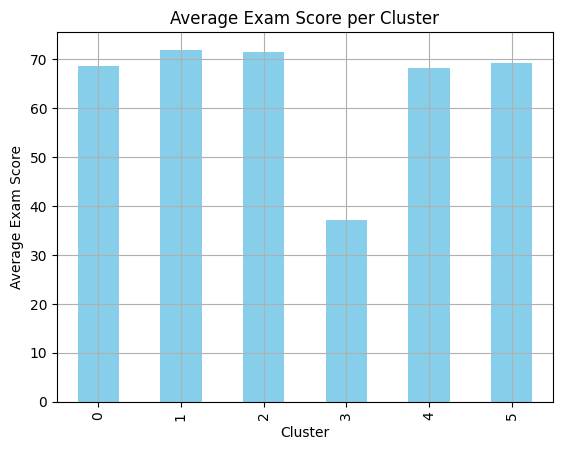

In [ ]:
# Data visualization of Average Exam Score per each cluster
data_df.groupby("clusters")["exam_score"].mean().plot(kind='bar', color='skyblue')
plt.title("Average Exam Score per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Exam Score")
plt.grid(True)
plt.show()

Here are the summarized behavioral profiles of each cluster based on lifestyle features and their average exam scores:

---

**Cluster 0**
- Study hours per day: Moderate (3.53)  
- Sleep: Slightly lower (6.44)  
- Social media and screen time: High (2.38 hrs, 4.21 total)  
- Attendance: 76.78%  
- Exam Score: 68.69

Insight: This group appears to be digitally active with a moderate academic lifestyle. They study decently and perform fairly, though screen time might slightly affect performance.

---

**Cluster 1**
- Study hours per day: Moderately high (3.57)  
- Sleep: Slightly higher (6.54)  
- Screen time: High (4.36 total)  
- Attendance: 90.46%  
- Exam Score: 71.91 (Highest)

Insight: Students in this cluster show good attendance and balanced habits. Despite high screen time, consistent attendance and study hours help them achieve solid scores.

---

**Cluster 2**
- Study hours per day: Highest (3.64)  
- Sleep: Average (6.43)  
- Screen time: Highest (4.45)  
- Attendance: 98.09%  
- Exam Score: 71.37

These students combine high attendance with dedicated study hours. Even with heavy screen use, they maintain strong academic performance, likely due to study routine and strong motivation.

---

**Cluster 3**
- Study hours per day: None (0.00)  
- Sleep: Slightly low (6.01)  
- Screen time: High (4.90), with an extremely high screen-study ratio (49.00)  
- Attendance: 84.12%  
- Exam Score: 37.09

This group seems to represent disengaged or underperforming students. With no study time and high digital activity, their exam performance is significantly low.

---

**Cluster 4**
- Study hours per day: High (3.60)  
- Sleep: Highest (6.51)  
- Screen time: Moderate  
- Attendance: Lowest among clusters (67.25%)  
- Exam Score: 68.23

Despite having the lowest attendance, these students maintain decent scores through strong study habits and sufficient sleep. They might be more independent or self-directed learners.

---

**Cluster 5**
- Study hours per day: High (3.61)  
- Sleep: Normal (6.46)  
- Screen time: Balanced  
- Attendance: 83.85%  
- Exam Score: 69.27

This cluster shows a stable and balanced lifestyle. Moderate attendance, consistent study, and no extremes in behavior contribute to their reliable academic performance.

## C. Model Performance
 - Which model performed best? Why?
    >Lookig at the three regression models tested, the Linear Regression performed the best. It had the lowest Mean Absolute Error (MAE) with 4.23, the lowest Root Mean Squared Error (RMSE) with 5.32, and the highest R² with a near to 1 score of 0.90. This means it was able to have 90% of the variance in exam scores and made relatively accurate predictions. The Random Forest Regressor was the second best. It had a higher MAE of 5.14 and RMSE of 6.58, with an R² score of 0.84. While still accurate, it was not as good as the linear model. The Decision Tree Regressor performed the least model among the three. It had the highest MAE of 6.52 and RMSE of 8.35, and the lowest R² score having 0.75, which shows that its predictions were less reliable compared to the two models.

 - Are there trade-offs between interpretability and accuracy?
    >Yes, there is a trade-off between interpretability and accuracy. We can say that the linear regression is the easiest to interpret compared to the two models. The coefficients tell us directly how each feature influences the exam scores. It is precise and clear, and hence a good choice whenever we wish to describe the model's decision. Random Forest is generally more accurate than simple models in many cases, especially with complex or nonlinear data. However, it is harder to interpret because it combines many decision trees. You can use feature importance tools, but the inner logic is not as straightforward. Decision Tree is more interpretable than Random Forest because it shows a single path of decisions. However, in this case, its accuracy was much lower, which makes it a weaker choice despite being easier to explain. Overall, Linear Regression gave the best balance of performance and interpretability in this analysis.


## D. Real-World Implications
 - What advice could you give students based on your findings?
    >Students who consistently study more, attend classes regularly, and maintain good sleep and mental health tend to perform better in exams. Even small improvements in these habits can lead to higher scores. It's not about avoiding screen time completely, but about keeping it in balance with study and rest.
 - Are there surprising or counterintuitive results?
    >Yes. Some students with high screen time still performed well — especially those who also had high attendance and study time. This shows that screen time alone isn't always harmful, as long as it doesn't replace more important habits like studying and sleeping. Also, one group with zero study hours had the lowest scores, even though their attendance wasn’t terrible. This confirms that simply showing up to class isn’t enough — students need to actively study to succeed.



## Conclusion

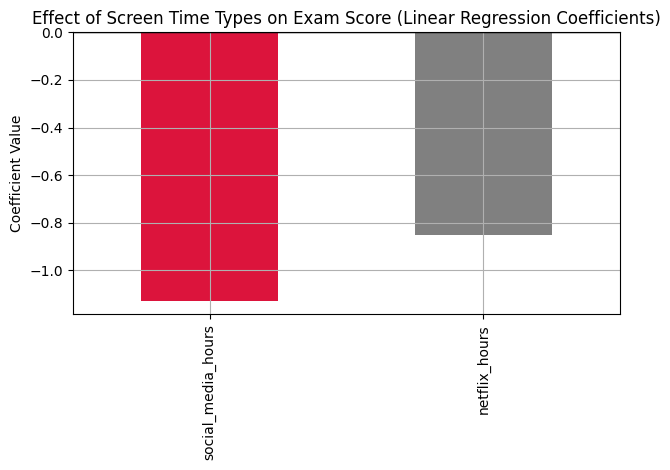

In [90]:
# Get coefficients of social media hours and netflix hours
coeff_df = pd.Series(lr_model.coef_, index=X_train.columns).sort_values()
coeff_df[["social_media_hours", "netflix_hours"]]

coeff_df[["social_media_hours", "netflix_hours"]].plot(kind="bar", color=["crimson", "gray"])
plt.title("Effect of Screen Time Types on Exam Score (Linear Regression Coefficients)")
plt.ylabel("Coefficient Value")
plt.axhline(0, color="black", linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.show()


Using our best-performing model (Linear Regression), we compared the impact of social media and Netflix usage on exam scores. The model's coefficients show that social media hours have a stronger negative effect on performance than Netflix hours.

This means that, holding other factors constant, an increase in social media use leads to a larger drop in exam scores than an equivalent increase in Netflix time.

The comparison is further supported by our cluster analysis, where students with higher social media usage consistently scored lower, even when sleep and screen time were similar. Therefore, the data suggests that social media is more harmful to academic performance than watching Netflix.

